In [2]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

what is the goal that you are trying to accomplish here?
to get bins of the population data 


*how to split the column into county and into state<br>
*then you can filter out by state

In [4]:
fast_food_10000_df = pd.read_csv('new_fast_food_combined_data.csv')
fast_food_10000_df.head()

,County,"Fast-food restaurants, 2011","Fast-food restaurants, 2016","Fast-food restaurants (% change), 2011-16","Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16"
0,Alameda,1090,1293,18.623853,7.11388,7.82102,9.940291
1,Alpine,2,0,-100.000000,18.29826,0.00000,-100.000000
2,Amador,12,21,75.000000,3.19668,5.60403,75.308222
3,Butte,147,158,7.482993,6.68173,6.97495,4.388394
4,Calaveras,26,30,15.384615,5.75692,6.62032,14.997581


In [5]:
fast_food_10000_df.columns

Index(['County', 'Fast-food restaurants, 2011', 'Fast-food restaurants, 2016',
       'Fast-food restaurants (% change), 2011-16',
       'Fast-food restaurants/10,000 pop, 2011',
       'Fast-food restaurants/10,000 pop, 2016',
       'Fast-food restaurants/1,000 pop (% change), 2011-16'],
      dtype='object')

In [8]:
del fast_food_10000_df['Fast-food restaurants, 2011']
del fast_food_10000_df['Fast-food restaurants, 2016']
del fast_food_10000_df['Fast-food restaurants (% change), 2011-16']

In [10]:
fast_food_10000_df.head()

,County,"Fast-food restaurants/10,000 pop, 2011","Fast-food restaurants/10,000 pop, 2016","Fast-food restaurants/1,000 pop (% change), 2011-16"
0,Alameda,7.11388,7.82102,9.940291
1,Alpine,18.29826,0.00000,-100.000000
2,Amador,3.19668,5.60403,75.308222
3,Butte,6.68173,6.97495,4.388394
4,Calaveras,5.75692,6.62032,14.997581


(array([42., 14.,  1.,  1.]),
 array([ 3.19668 ,  6.972075, 10.74747 , 14.522865, 18.29826 ]),
 <a list of 4 Patch objects>)

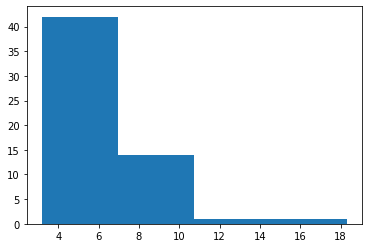

In [13]:
plt.hist(fast_food_10000_df['Fast-food restaurants/10,000 pop, 2011'], bins=4)

(array([ 5., 40., 12.,  1.]),
 array([ 0.     ,  3.72314,  7.44628, 11.16942, 14.89256]),
 <a list of 4 Patch objects>)

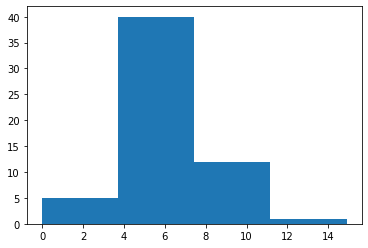

In [14]:
plt.hist(fast_food_10000_df['Fast-food restaurants/10,000 pop, 2016'], bins=4)

(array([ 1.,  6., 50.,  1.]),
 array([-100.       ,  -56.1729445,  -12.345889 ,   31.4811665,
          75.308222 ]),
 <a list of 4 Patch objects>)

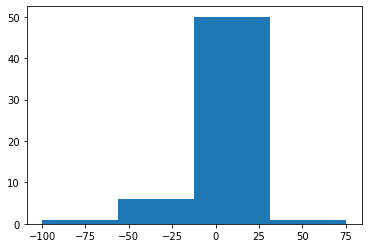

In [16]:
plt.hist(fast_food_10000_df['Fast-food restaurants/1,000 pop (% change), 2011-16'],bins=4)

In [17]:
fips_df = pd.read_csv('fips.csv')
fips_df.head()

,County,CountyFIPS
0,Alameda,6001
1,Alpine,6003
2,Amador,6005
3,Butte,6007
4,Calaveras,6009


In [19]:
merged_fastfood_df = pd.merge(fips_df, fast_food_10000_df, how='outer', on='County')


58

In [22]:
merged_fastfood_df.columns

Index(['County', 'CountyFIPS', 'Fast-food restaurants/10,000 pop, 2011',
       'Fast-food restaurants/10,000 pop, 2016',
       'Fast-food restaurants/1,000 pop (% change), 2011-16'],
      dtype='object')

In [23]:
merged_fastfood_df["Fast-food restaurants/10,000 pop, 2011"] = merged_fastfood_df["Fast-food restaurants/10,000 pop, 2011"].map("{:.2f}".format)
merged_fastfood_df["Fast-food restaurants/10,000 pop, 2016"] = merged_fastfood_df["Fast-food restaurants/10,000 pop, 2016"].map("{:.2f}".format)
merged_fastfood_df["Fast-food restaurants/1,000 pop (% change), 2011-16"] = merged_fastfood_df["Fast-food restaurants/1,000 pop (% change), 2011-16"].map("{:.2f}".format)

In [25]:
merged_fastfood_df = merged_fastfood_df.astype({"Fast-food restaurants/10,000 pop, 2011": float, 
                                                  "Fast-food restaurants/10,000 pop, 2016": float,
                                                 "Fast-food restaurants/1,000 pop (% change), 2011-16": float})

In [26]:
merged_fastfood_df.to_csv("fast_food_per_10000.csv", encoding="utf-8", index=False, header=True)

In [65]:
merged_education_df.columns

Index(['County', 'College Rate_x', 'College Rate_y'], dtype='object')

In [66]:
merged_education_df = merged_education_df.rename(columns={'College Rate_x':'2012 College Rate',
                                                  'College Rate_y':'2016 College Rate'})

In [67]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate
0,Alameda,32.422106,35.075694
1,Alpine,25.313283,23.733108
2,Amador,21.777354,23.639856
3,Butte,21.237068,23.130112
4,Calaveras,22.524007,23.526916


In [68]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate
0,Alameda,32.422106,35.075694
1,Alpine,25.313283,23.733108
2,Amador,21.777354,23.639856
3,Butte,21.237068,23.130112
4,Calaveras,22.524007,23.526916


In [69]:
merged_education_df["College Rate Change"] = merged_education_df["2016 College Rate"] - \
    merged_education_df["2012 College Rate"]

In [70]:
merged_education_df.head()

,County,2012 College Rate,2016 College Rate,College Rate Change
0,Alameda,32.422106,35.075694,2.653588
1,Alpine,25.313283,23.733108,-1.580175
2,Amador,21.777354,23.639856,1.862502
3,Butte,21.237068,23.130112,1.893043
4,Calaveras,22.524007,23.526916,1.002909


(array([21., 24., 11.,  2.]),
 array([11.06950912, 19.47591794, 27.88232675, 36.28873557, 44.69514439]),
 <a list of 4 Patch objects>)

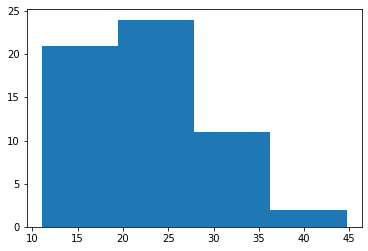

In [71]:
plt.hist(merged_education_df["2012 College Rate"], bins=4)

In [72]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               58 non-null     object 
 1   2012 College Rate    58 non-null     float64
 2   2016 College Rate    58 non-null     float64
 3   College Rate Change  58 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


In [73]:
merged_education_df["2012 College Rate"] = merged_education_df["2012 College Rate"].map("{:.2f}".format)
merged_education_df["2016 College Rate"] = merged_education_df["2016 College Rate"].map("{:.2f}".format)
merged_education_df["College Rate Change"] = merged_education_df["College Rate Change"].map("{:.2f}".format)

In [74]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   County               58 non-null     object
 1   2012 College Rate    58 non-null     object
 2   2016 College Rate    58 non-null     object
 3   College Rate Change  58 non-null     object
dtypes: object(4)
memory usage: 2.3+ KB


In [75]:
merged_education_df = merged_education_df.astype({"2012 College Rate": float, 
                                                  "2016 College Rate": float,
                                                 "College Rate Change": float})

In [76]:
merged_education_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   County               58 non-null     object 
 1   2012 College Rate    58 non-null     float64
 2   2016 College Rate    58 non-null     float64
 3   College Rate Change  58 non-null     float64
dtypes: float64(3), object(1)
memory usage: 2.3+ KB


(array([21., 24., 11.,  2.]),
 array([11.07  , 19.4775, 27.885 , 36.2925, 44.7   ]),
 <a list of 4 Patch objects>)

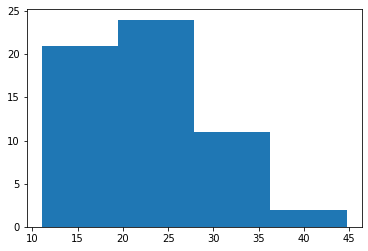

In [77]:
plt.hist(merged_education_df["2012 College Rate"], bins=4)

(array([21., 24., 10.,  3.]),
 array([12.13 , 20.945, 29.76 , 38.575, 47.39 ]),
 <a list of 4 Patch objects>)

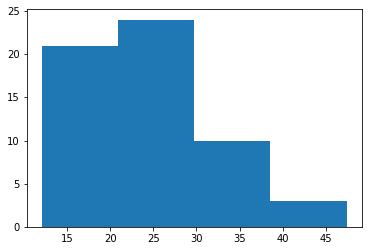

In [78]:
plt.hist(merged_education_df["2016 College Rate"], bins=4)

(array([ 6., 35., 16.,  1.]),
 array([-1.58  ,  0.1425,  1.865 ,  3.5875,  5.31  ]),
 <a list of 4 Patch objects>)

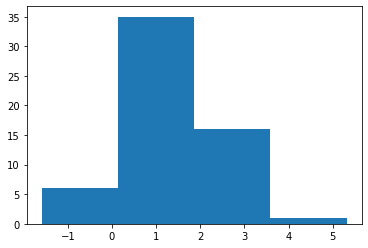

In [79]:
plt.hist(merged_education_df["College Rate Change"], bins=4)

In [81]:
merged_education_df

,County,2012 College Rate,2016 College Rate,College Rate Change
0,Alameda,32.42,35.08,2.65
1,Alpine,25.31,23.73,-1.58
2,Amador,21.78,23.64,1.86
3,Butte,21.24,23.13,1.89
4,Calaveras,22.52,23.53,1.00
5,Colusa,13.80,15.28,1.48
6,Contra Costa,31.34,32.96,1.62
7,Del Norte,14.20,16.47,2.27
8,El Dorado,29.00,31.01,2.01
9,Fresno,15.91,16.77,0.86


In [82]:
merged_education_df.to_csv("education_college_rate_differences.csv", encoding="utf-8", index=False, header=True)

In [5]:
population_2016_df = california_data[["County","Population"]]
population_2016_df = population_2016_df.reset_index(drop=True)
population_2016_df.head()

,County,Population
0,Alameda,1605217.0
1,Alpine,1184.0
2,Amador,36963.0
3,Butte,223877.0
4,Calaveras,44787.0


In [6]:
fips_df = pd.read_csv('fips_dataframe.csv')
fips_df = fips_df[["FIPS","CTYNAME"]]
fips_df.head()

,FIPS,CTYNAME
0,6001,Alameda County
1,6003,Alpine County
2,6005,Amador County
3,6007,Butte County
4,6009,Calaveras County


In [7]:
for index, row in fips_df.iterrows():
    county = row["CTYNAME"]
    county_split = county.split(" County")
    fips_df.loc[index, "County"] = str(county_split[0])
        
fips_df.head()

,FIPS,CTYNAME,County
0,6001,Alameda County,Alameda
1,6003,Alpine County,Alpine
2,6005,Amador County,Amador
3,6007,Butte County,Butte
4,6009,Calaveras County,Calaveras


In [8]:
del fips_df["CTYNAME"]

In [10]:
merge_df = pd.merge(population_2016_df, fips_df, on="County")
merge_df = merge_df[["FIPS","County","Population"]]
merge_df.head()

,FIPS,County,Population
0,6001,Alameda,1605217.0
1,6003,Alpine,1184.0
2,6005,Amador,36963.0
3,6007,Butte,223877.0
4,6009,Calaveras,44787.0


In [11]:
# Save as a csv
# Note to avoid any issues later, use encoding="utf-8"
merge_df.to_csv("population_2016.csv", encoding="utf-8", index=False, header=True)

In [23]:
max(merge_df['Population'])

9787747.0

In [24]:
min(merge_df['Population'])

1167.0

In [35]:
merge_df

,County,Population,Fips
0,Alameda,1494876.0,001
1,Alpine,1167.0,003
2,Amador,38244.0,005
3,Butte,219309.0,007
4,Calaveras,45794.0,009
5,Colusa,21297.0,011
6,Contra Costa,1037817.0,013
7,Del Norte,28561.0,015
8,El Dorado,179878.0,017
9,Fresno,920623.0,019


In [45]:
# Create bins in which to place values based upon TED Talk views
bins = [0, 14999, 59999, 150000, 430000, 2080000, 10000000]
# Create labels for these bins
group_labels = ["0 to 13k", "15k to 59k", "60k to 134k", "135k to 429k", 
               "430k to 2 mil", "2 mil to 10 mil"]

In [46]:
merge_df["Pop Group"] = pd.cut(merge_df["Population"], bins, labels=group_labels)

<AxesSubplot:xlabel='Pop Group'>

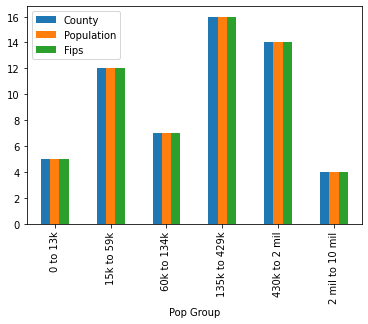

In [57]:
merge_df.groupby('Pop Group').count().plot(kind="bar")

In [88]:
sorted_df["Population"].median()

178554.5

In [65]:
test_series = sorted_df["Population"].values

In [79]:
test_series

array([1.167000e+03, 3.277000e+03, 9.587000e+03, 1.371100e+04,
       1.401600e+04, 1.829000e+04, 1.845700e+04, 2.019200e+04,
       2.129700e+04, 2.802700e+04, 2.856100e+04, 3.500100e+04,
       3.824400e+04, 4.468700e+04, 4.579400e+04, 5.487300e+04,
       5.573600e+04, 6.298500e+04, 6.439200e+04, 7.181700e+04,
       8.752500e+04, 9.419200e+04, 9.839200e+04, 1.335850e+05,
       1.353770e+05, 1.496110e+05, 1.523350e+05, 1.713430e+05,
       1.772310e+05, 1.798780e+05, 1.988890e+05, 2.193090e+05,
       2.506660e+05, 2.536060e+05, 2.594020e+05, 2.678710e+05,
       3.435540e+05, 4.113850e+05, 4.116200e+05, 4.197930e+05,
       4.362340e+05, 4.785510e+05, 5.124690e+05, 6.802770e+05,
       7.116220e+05, 7.979830e+05, 8.157450e+05, 8.292540e+05,
       9.206230e+05, 1.037817e+06, 1.408480e+06, 1.494876e+06,
       1.762754e+06, 2.023452e+06, 2.154844e+06, 2.989948e+06,
       3.060849e+06, 9.787747e+06])

https://data36.com/plot-histogram-python-pandas/

https://mode.com/example-gallery/python_histogram/

https://www.youtube.com/watch?v=snkkKrek7TU
Data camp binning data
making a histogram 

In [51]:
sorted_df = merge_df.sort_values(by="Population")
sorted_df.head()

,County,Population,Fips,Pop Group
1,Alpine,1167.0,003,0 to 13k
45,Sierra,3277.0,091,0 to 13k
24,Modoc,9587.0,049,0 to 13k
52,Trinity,13711.0,105,0 to 13k
25,Mono,14016.0,051,0 to 13k


In [59]:
print(sorted_df["Population"].mean())
print(sorted_df["Population"].std())

637400.0
1410432.107127893


In [61]:
sorted_df["Population"]

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [95]:
new_df = sorted_df.loc[sorted_df["Population"] < 9000000]

(array([36.,  7.,  5.,  2.,  2.,  1.,  1.,  1.,  0.,  2.]),
 array([1.1670000e+03, 3.0713520e+05, 6.1310340e+05, 9.1907160e+05,
        1.2250398e+06, 1.5310080e+06, 1.8369762e+06, 2.1429444e+06,
        2.4489126e+06, 2.7548808e+06, 3.0608490e+06]),
 <BarContainer object of 10 artists>)

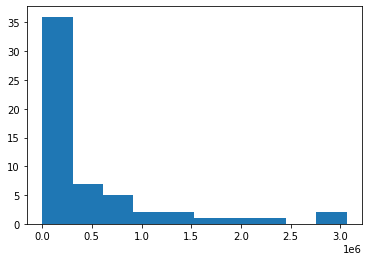

In [96]:
plt.hist(new_df["Population"])

In [91]:
test_again = sorted_df["Population"]
test_again

1        1167.0
45       3277.0
24       9587.0
52      13711.0
25      14016.0
21      18290.0
13      18457.0
31      20192.0
5       21297.0
10      28027.0
7       28561.0
17      35001.0
2       38244.0
46      44687.0
4       45794.0
34      54873.0
54      55736.0
51      62985.0
16      64392.0
57      71817.0
22      87525.0
50      94192.0
28      98392.0
11     133585.0
27     135377.0
19     149611.0
15     152335.0
12     171343.0
44     177231.0
8      179878.0
56     198889.0
3      219309.0
20     250666.0
23     253606.0
43     259402.0
39     267871.0
30     343554.0
26     411385.0
47     411620.0
41     419793.0
53     436234.0
48     478551.0
49     512469.0
38     680277.0
40     711622.0
37     797983.0
55     815745.0
14     829254.0
9      920623.0
6     1037817.0
33    1408480.0
0     1494876.0
42    1762754.0
35    2023452.0
32    2154844.0
29    2989948.0
36    3060849.0
18    9787747.0
Name: Population, dtype: float64

In [80]:
height = [185, 172, 172, 169, 181, 162, 186, 171, 177, 174, 184, 163, 174, 173, 182, 169, 174, 170, 176, 179, 169, 182, 181, 179, 181, 171, 175, 170, 174, 179, 171, 173, 171, 170, 171, 175, 169, 177, 185, 180, 174, 170, 171, 186, 176, 172, 177, 188, 176, 179, 177, 173, 169, 173, 174, 179, 181, 181, 177, 181, 171, 183, 179, 174, 178, 175, 182, 185, 189, 167, 167, 172, 176, 181, 177, 163, 174, 180, 177, 180, 174, 174, 177, 178, 177, 176, 171, 178, 176, 182, 183, 177, 173, 172, 178, 176, 173, 176, 172, 180, 173, 183, 178, 179, 169, 177, 180, 170, 174, 176, 167, 177, 181, 170, 178, 168, 175, 166, 182, 178, 175, 171, 183, 187, 164, 183, 185, 178, 168, 181, 174, 172, 168, 179, 180, 172, 179, 169, 180, 176, 174, 175, 181, 180, 179, 176, 176, 179, 177, 180, 174, 161, 182, 189, 178, 175, 175, 175, 176, 169, 172, 170, 177, 174, 178, 174, 181, 177, 189, 164, 172, 181, 191, 174, 176, 174, 183, 174, 180, 174, 168, 177, 179, 183, 175, 172, 179, 177, 177, 175, 182, 178, 187, 182, 179, 166, 179, 178, 180, 182, 173, 180, 172, 187, 168, 165, 166, 170, 169, 187, 174, 167, 182, 172, 168, 181, 179, 173, 184, 176, 185, 179, 185, 176, 168, 190, 172, 174, 171, 174, 177, 177, 179, 186, 175, 168, 168, 172, 165, 180, 173, 174, 175, 167, 170, 180, 179, 173, 186, 168]

(array([ 4.,  7., 24., 34., 48., 48., 46., 19., 14.,  6.]),
 array([161., 164., 167., 170., 173., 176., 179., 182., 185., 188., 191.]),
 <BarContainer object of 10 artists>)

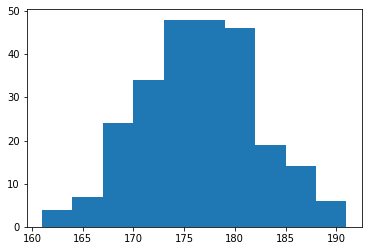

In [81]:
plt.hist(height)

In [85]:
height_array = np.asarray(height)

In [86]:
np.std(height_array)

5.712240891279008

In [89]:
np.median(height_array)

176.0

https://numpy.org/doc/stable/reference/generated/numpy.asarray.html

https://numpy.org/doc/stable/reference/generated/numpy.mean.html

https://numpy.org/doc/stable/reference/generated/numpy.std.html


https://stackoverflow.com/questions/33385238/how-to-convert-pandas-single-column-data-frame-to-series-or-numpy-vector

https://mode.com/example-gallery/python_histogram/